In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
dataset = pd.read_csv('input/P39-Minimizing-Churn-Data/churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


<pre>
 Description of each Columns
userid - MongoDB userid
churn  - Active = No | Suspended < 30 = No Else Churn = Yes
age - age of the customer
city - city of the customer
state- state where the customer lives
postal_code - zip code of the customer
zodiac_sign- zodiac sign of the customer
rent_or_own - Does the customer rents or owns a house 
more_than_one_mobile_device - does the customer use more than one mobile device
payFreq- Pay Frequency of the cusomter
in_collections - is the customer in collections
loan_pending - is the loan pending
withdrawn_application - has the customer withdrawn the loan applicaiton 
paid_off_loan- has the customer paid of the loan
did_not_accept_funding - customer did not accept funding
cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
cash_back_amount - Sum of cash back dollars received by a customer
used_ios- Has the user used an iphone
used_android - Has the user used a android based phone
has_used_mobile_and_web - Has the user used mobile and web platforms
has_used_web - Has the user used MoneyLion Web app
has_used_mobile - as the user used MoneyLion  app
has_reffered- Has the user referred
cards_clicked - How many times a user has clicked the cards
cards_not_helpful- How helpful was the cards
cards_helpful- How helpful was the cards
cards_viewed- How many times a user viewed the cards
cards_share- How many times a user shared his cards
trivia_view_results-How many times a user viewed trivia results
trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
trivia_view_locked - How many times a user viewed trivia view locked screen
trivia_shared_results- How many times a user shared trivia results 
trivia_played - How many times a user played trivia 
re_linked_account- Has the user re linked account
un_linked_account - Has the user un linked account
credit_score - Customer's credit score
</pre>

In [6]:
# Nan 제거
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
dataset = dataset[pd.notnull(dataset['age'])]

In [9]:
# null 값이 많은 두 columns 제거
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [10]:
# 히스토그램
dataset2 = dataset.drop(columns = ['user', 'churn'])

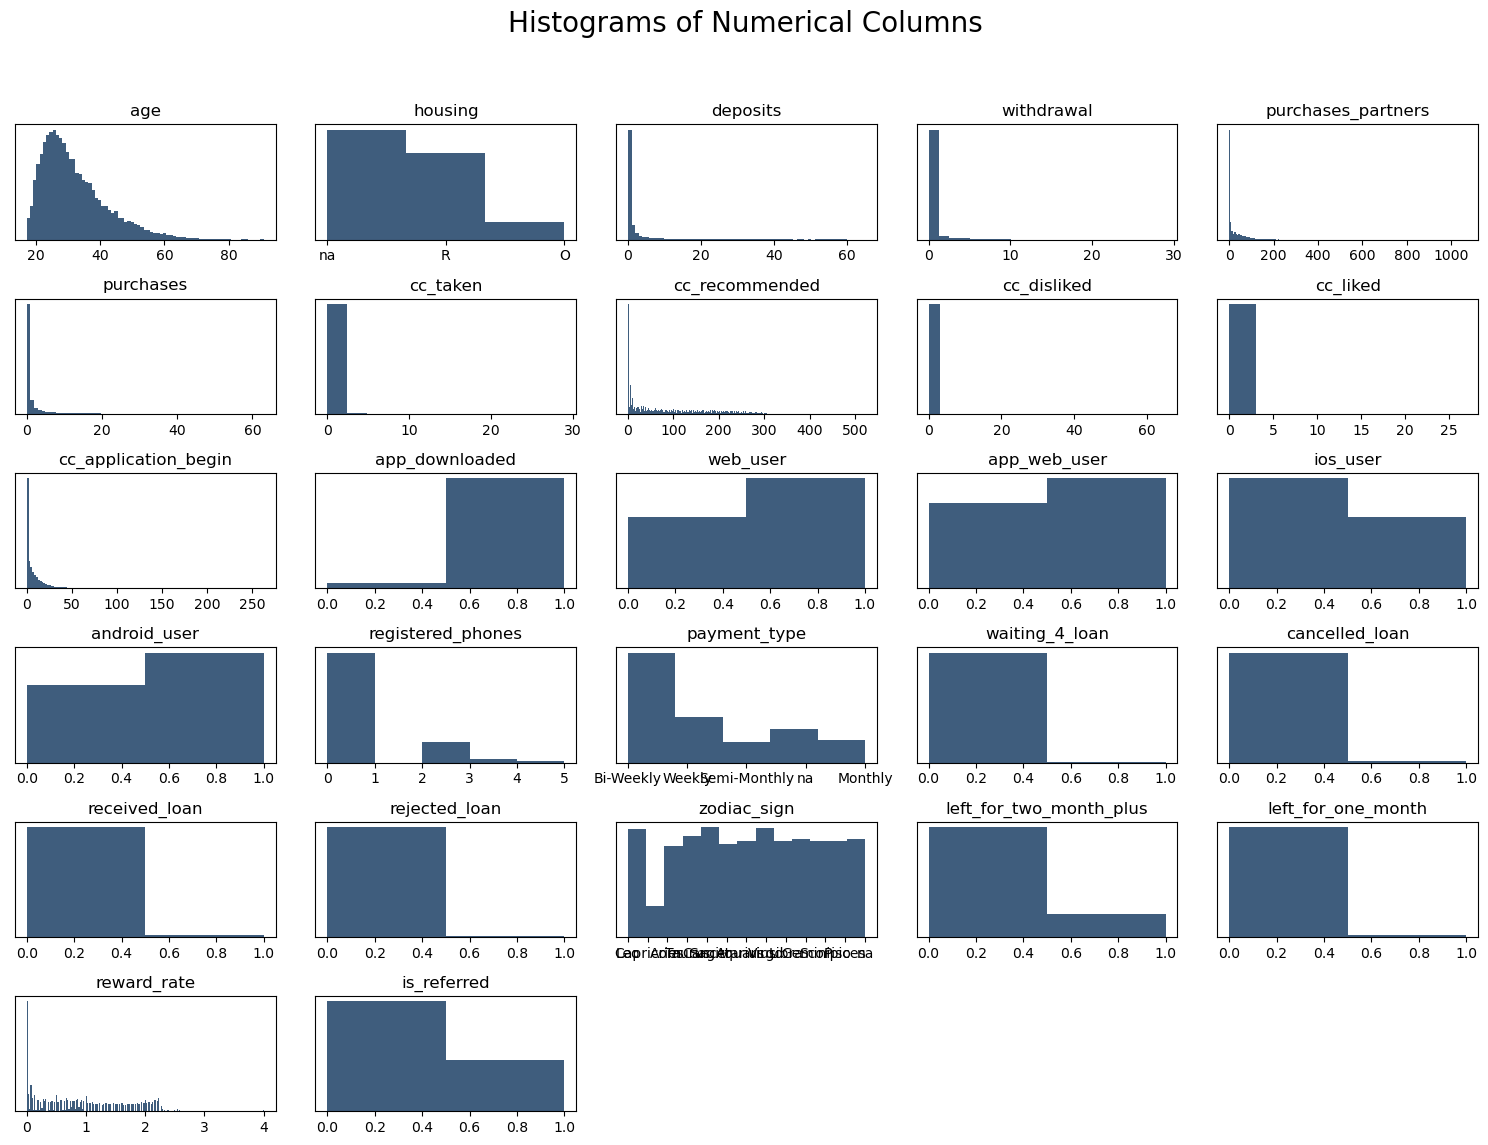

In [11]:
# matplot에서 figure 객체(틀), ax 객체(캔버스) 라고 생각하라
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize =20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i) 
    f = plt.gca()        # Get current axes instance
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique()) # 전체열 쿼리후 unique로 모든 고유값 가져옴
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Binary column 이 극단적인 값을 가지면 극단적인 결과를 불러 올 수 있다.
다른 열의 값과 관계없이 결과를 대표할 수도 있기 때문임

In [12]:
# 파이차트 구성
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

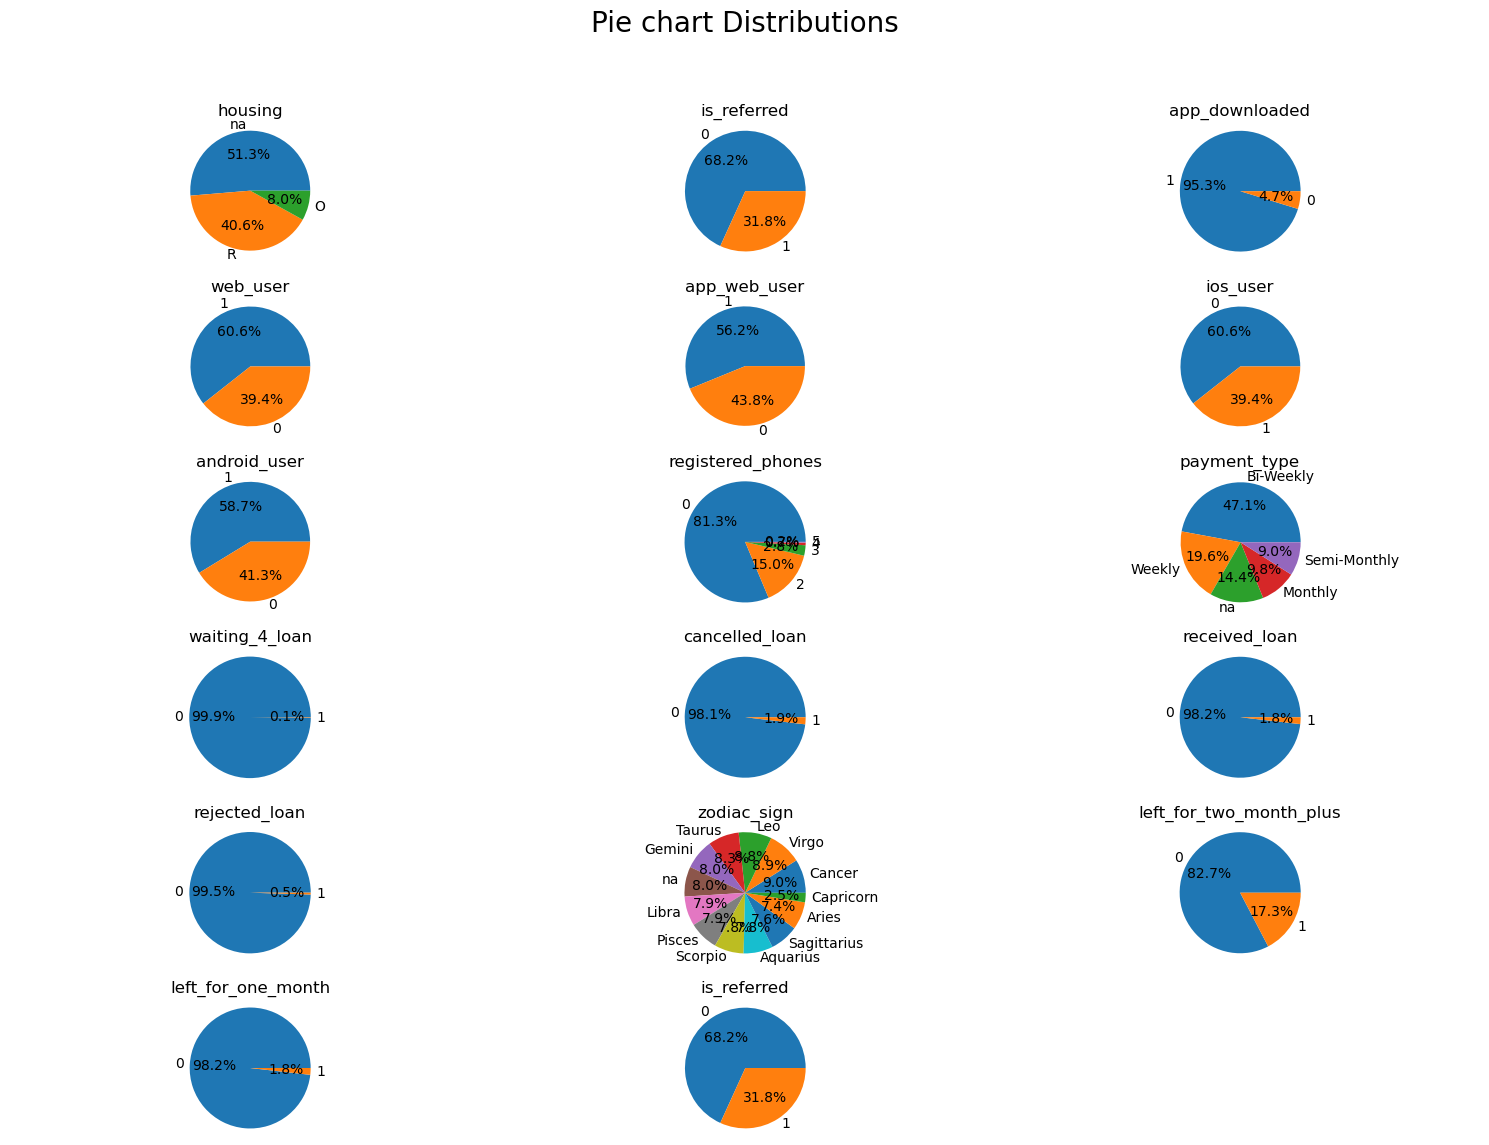

In [13]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie chart Distributions', fontsize =20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i) 
    f = plt.gca()        # Get current axes instance
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index, autopct ='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

waiting_4_loan 의 0.1 크기의 subset이 모델 생성시 유용한가? 

In [14]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

27:8 으로 편향된 결과를 갖지는 않았다.

In [15]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [16]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [17]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [18]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

모든 작은 하위 세트가 반응변수를 균등하게 갖는 분포를 보인다.
따라서 모두 모델 생성시 사용 가능하다

<AxesSubplot:title={'center':'Correlation with the Response Variable'}>

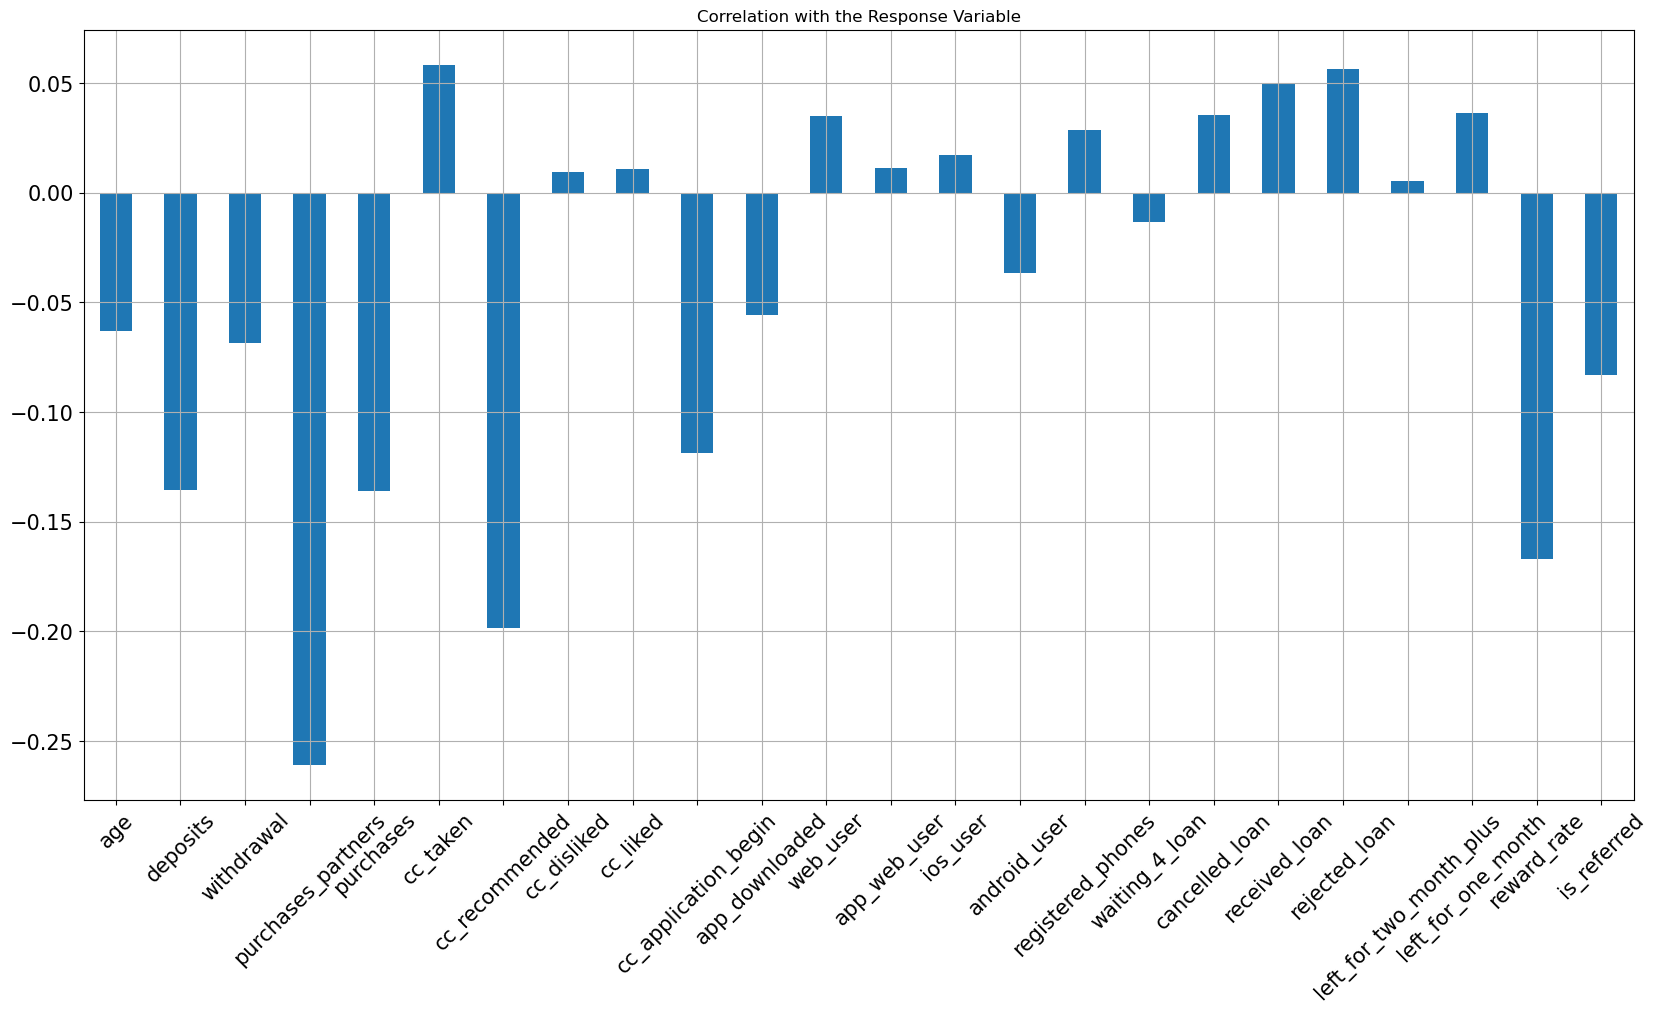

In [19]:
# 고르지 않은 Feature 들을 확인하자
# 범주형 변수를 지우고 이진 변수와 수치형 변수를 유지
dataset.drop(columns = ['churn', 'user', 'housing', 
                        'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
    figsize = (20, 10), title = 'Correlation with the Response Variable', fontsize = 15,
    rot = 45, grid = True)



<AxesSubplot:>

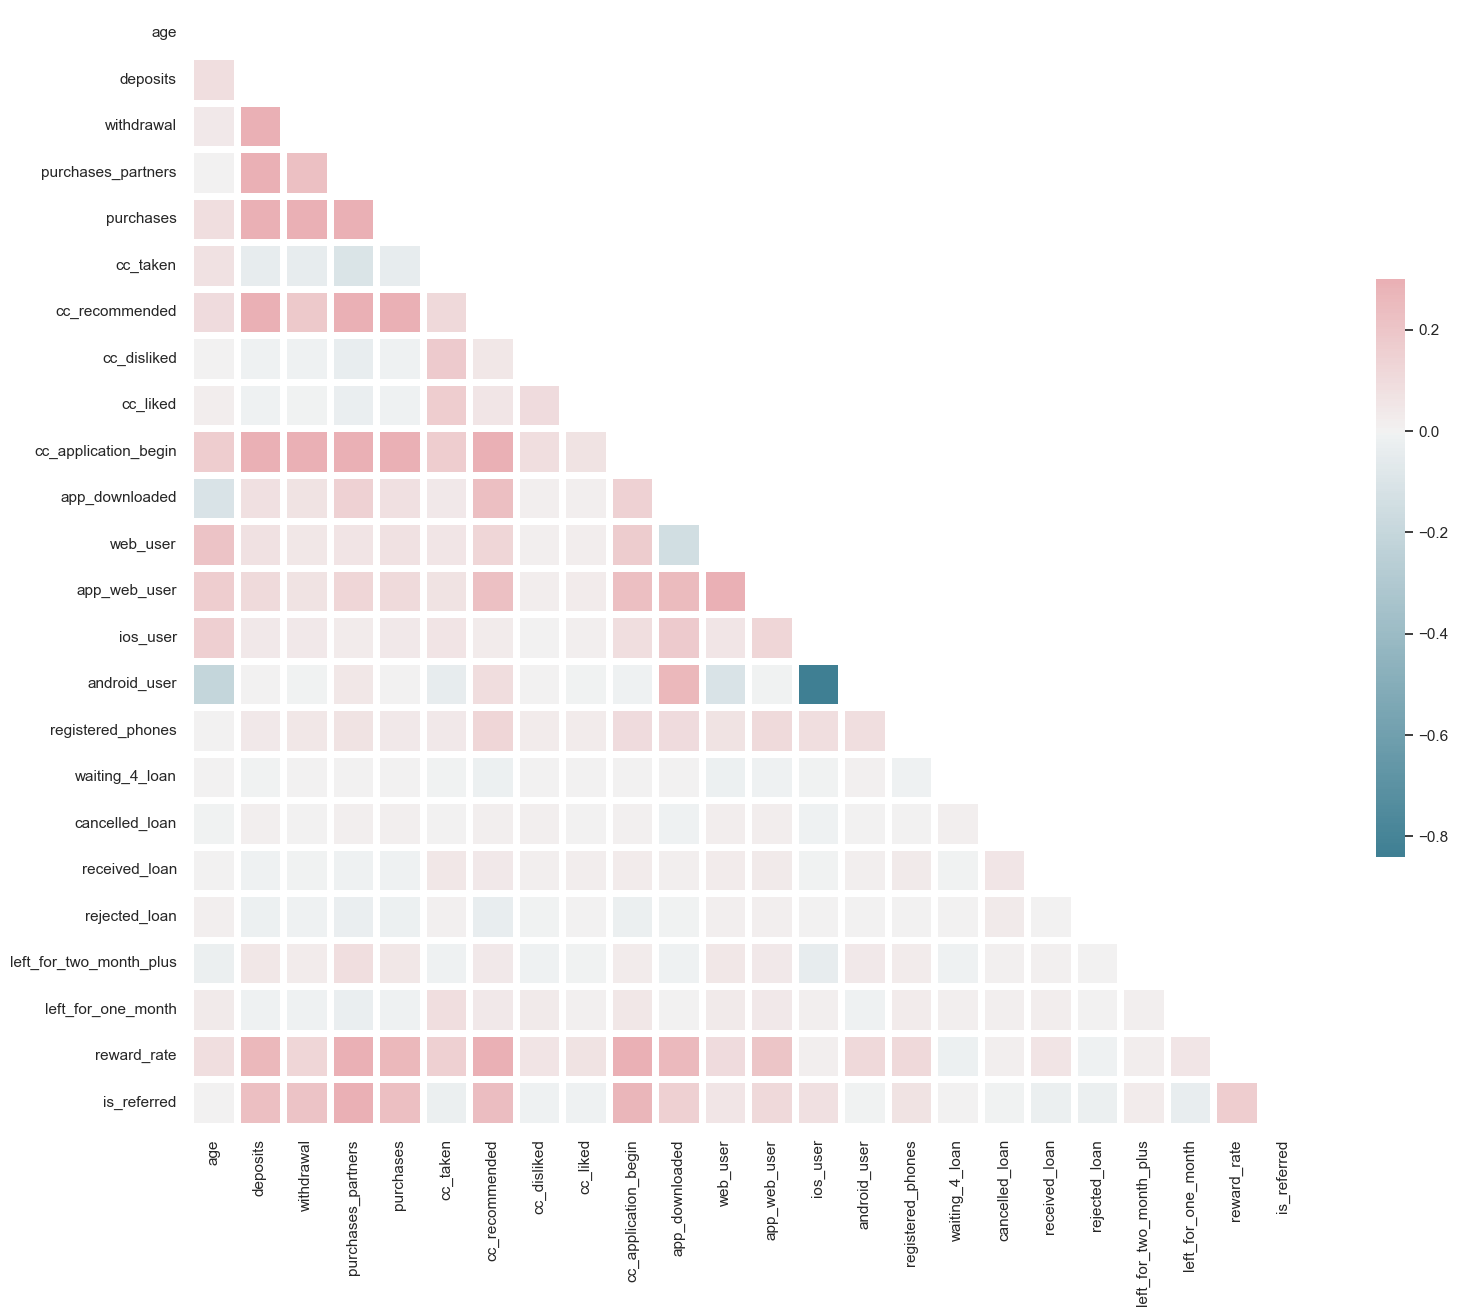

In [20]:
# matplot에서 figure 객체(틀), ax 객체(캔버스) 라고 생각하라
sn.set(style ="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
          square=True, linewidths=5, cbar_kws={"shrink": .5})

상관 행렬을 봤을때 android_user 와 ios_user 이 강한 음의 상관관계를 가짐<br>
따라서 둘 중 하나만 살려놓고 없애버리면 된다<br>
0 또는 1로 나타 낼 수 있기 때문임<br><br>
app_web_user 는 web_user, app_downloaded가 1일 때 무조건 1이다, 이는 독립변수가 아님<br>
또한 이 정보는 상관행렬로 알아낸 정보가 아님<br>
결론적으로 상관행렬이 모든 연관성을 표시하지는 못 한다는 것을 알 수 있다.


In [21]:
# 독립변수가 아닌 app_web_user를 삭제하자
dataset = dataset.drop(columns = ['app_web_user'])

In [22]:
dataset.to_csv('new_churn_data.csv', index=False)

# One Hot Encoding

In [23]:
import random

In [24]:
dataset = pd.read_csv('new_churn_data.csv')

In [25]:
# Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [26]:
# One-Hot Encoding
# 범주형 데이터를 처리 못하기에 One-Hot Encoding 을 사용하자
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [27]:
# 자동으로 One-Hot Encoding을 해준다
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [28]:
# Housing_na 는 housing_r 과 housing_o 가 0 일때 항상 1이다.
# One-Hot Encoding 된 필드 사이의 상관관계를 제거 하자
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), 
                                                   dataset['churn'],
                                                   test_size = 0.2,
                                                   random_state = 0)

In [31]:
# Balancing the Training set
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

모델 정확도가 60% 인 상황을 생각해보자 <br>
현 상황에서 모델이 모든 입력을 0 으로 분류해도 정확도가 60% 일 것이다. <br>
모델이 편향된 상태에서도 50% 이상의 정확도를 가져오는 문제를 해결하려면 <br>
학습 세트의 밸런싱이 필요하다.

In [32]:
# 반응변수의 0과 1을 고유 인덱스로 분리하자
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

# 둘 중 더 많은것을 찾아서
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
    
# 작은것과 똑같은 크기만큼 choice
random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

# loc 으로 항목을 인덱스로 찾는다
X_train = X_train.loc[new_indexes ]
y_train = y_train[new_indexes]

# 밸런싱 완료

In [33]:
# Feature Scailing
from sklearn.preprocessing import StandardScaler

In [34]:
sc_X = StandardScaler()
# Scaler 는 다차원 Numpy Array를 반환하고
# index와 열 이름을 잃기에 DataFrame으로 변환한다.
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

In [35]:
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [36]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [37]:
X_train = X_train2
X_test = X_test2

In [38]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.619736,-0.353592,-0.287643,-0.591495,-0.353591,-0.168699,-0.911440,-0.067958,-0.077108,-0.573549,...,-0.306014,-0.158652,-0.297743,-0.310474,-0.291690,-0.29607,-0.290673,-0.290447,-0.295287,-0.315751
19766,-0.418212,-0.353592,-0.287643,-0.640788,-0.353591,-0.168699,0.318520,1.265834,-0.077108,-0.573549,...,-0.306014,-0.158652,-0.297743,-0.310474,3.428295,-0.29607,-0.290673,-0.290447,-0.295287,-0.315751
8354,0.287120,-0.353592,-0.287643,-0.640788,-0.353591,-0.168699,2.004020,-0.067958,-0.077108,-0.240555,...,-0.306014,-0.158652,-0.297743,-0.310474,-0.291690,-0.29607,-0.290673,-0.290447,-0.295287,3.167054
17883,0.589406,-0.353592,-0.287643,0.049315,-0.353591,-0.168699,-0.182575,-0.067958,-0.077108,0.009191,...,-0.306014,-0.158652,-0.297743,-0.310474,-0.291690,-0.29607,-0.290673,-0.290447,3.386535,-0.315751
25149,-0.821259,-0.240965,-0.287643,-0.098564,-0.238472,-0.168699,-0.581173,-0.067958,-0.077108,-0.240555,...,-0.306014,-0.158652,-0.297743,-0.310474,-0.291690,3.37758,-0.290673,-0.290447,-0.295287,-0.315751


# Model Building

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# Fitting Model to the Training set
classifier = LogisticRegression(random_state = 0)

In [41]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [42]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [43]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [44]:
cm = confusion_matrix(y_test, y_pred)

In [45]:
accuracy_score(y_test, y_pred)

0.6181481481481481

In [46]:
# 정밀도 점수: 정탐 값 / (정탐 값 + 오탐 값)
precision_score(y_test, y_pred)

0.5276172125883108

좋지 않은 정밀도 점수

In [47]:
# 재현율: 정탐 값 / (정탐 값  + 미탐 값)
recall_score(y_test, y_pred)

0.7354521038495971

In [48]:
f1_score(y_test, y_pred)

0.6144353029169782

Test Data Accuracy: 0.6181


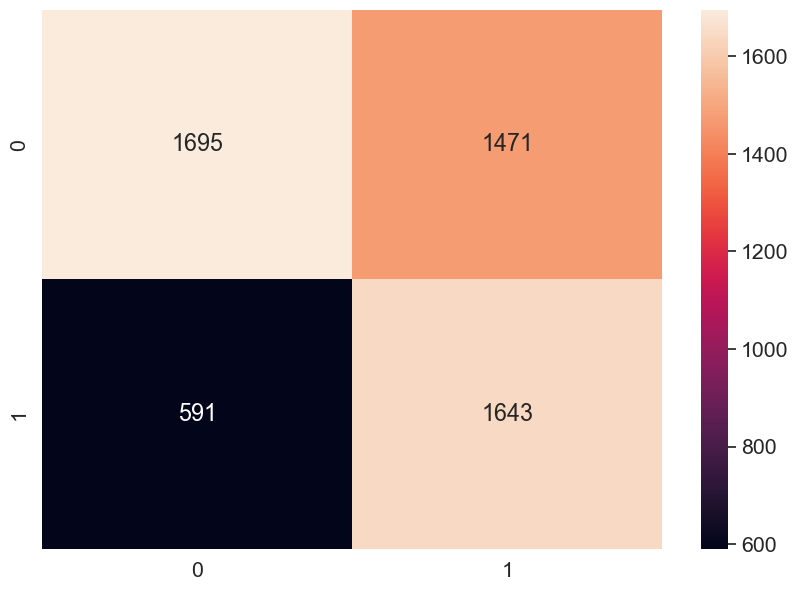

In [49]:
# Seaborn Confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sn.set(font_scale= 1.4)
sn.heatmap(df_cm, annot=True, fmt = 'g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [50]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

In [52]:
accuracies = cross_val_score(estimator = classifier,
                            X=X_train,
                            y=y_train,
                            cv=10)

In [53]:
accuracies

array([0.6336689 , 0.66442953, 0.66163311, 0.63422819, 0.62416107,
       0.63926174, 0.65212528, 0.63870246, 0.64932886, 0.66163311])

In [54]:
accuracies.mean()

0.645917225950783

In [55]:
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
         axis = 1)

,features,coef
0,age,-0.169584
1,deposits,0.055102
2,withdrawal,0.032311
3,purchases_partners,-0.689915
4,purchases,-0.182180
5,cc_taken,0.093574
6,cc_recommended,0.021679
7,cc_disliked,-0.007262
8,cc_liked,-0.002596
9,cc_application_begin,0.057061


# Feature Selection

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [59]:
# 테스트 할 모델
classifier = LogisticRegression()
rfe = RFE(classifier, step = 20)

In [60]:
rfe = rfe.fit(X_train, y_train)

In [61]:
# summarize the selection of the attributes
print(rfe.support_)

[ True  True False  True  True  True False False False  True False  True
  True  True  True False  True  True  True  True  True  True False False
  True  True False False  True False False  True False False False False
 False False False False False]


In [63]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_application_begin', 'web_user', 'ios_user', 'android_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Weekly',
       'zodiac_sign_Cancer'],
      dtype='object')

In [64]:
rfe.ranking_

array([1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [65]:
from sklearn.linear_model import LogisticRegression
# Fitting Model to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

In [67]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [70]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
print("ACC: ", accuracy_score(y_test, y_pred))
print("PREC: ", precision_score(y_test, y_pred))   # 정밀도 점수: 정탐 값 / (정탐 값 + 오탐 값)
print("RECALL: ", recall_score(y_test, y_pred))    # 재현율: 정탐 값 / (정탐 값  + 미탐 값)
print("F1: ", f1_score(y_test, y_pred))


ACC:  0.612037037037037
PREC:  0.5220564900031736
RECALL:  0.7363473589973142
F1:  0.6109563602599815


Test Data Accuracy: 0.6120


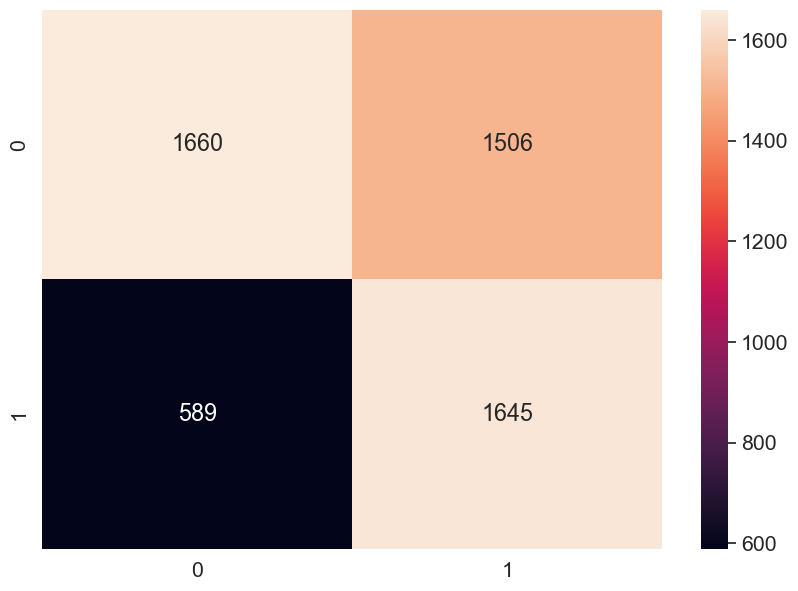

In [71]:
# Seaborn Confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sn.set(font_scale= 1.4)
sn.heatmap(df_cm, annot=True, fmt = 'g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [72]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ["features"]),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
         axis = 1)

,features,coef
0,age,-0.167608
1,deposits,0.090557
2,purchases_partners,-0.677519
3,purchases,-0.200621
4,cc_taken,0.089807
5,cc_application_begin,0.064507
6,web_user,0.149198
7,ios_user,0.074666
8,android_user,0.006469
9,registered_phones,0.090635


In [73]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [74]:
final_results

,user,churn,predicted_churn
0,53016,1.0,1
1,54963,0.0,0
2,10511,0.0,0
3,64269,0.0,1
4,30978,0.0,0
...,...,...,...
5395,50513,1.0,1
5396,42775,0.0,1
5397,15284,1.0,1
5398,10432,1.0,0


In [75]:
print(final_results)

       user  churn  predicted_churn
0     53016    1.0                1
1     54963    0.0                0
2     10511    0.0                0
3     64269    0.0                1
4     30978    0.0                0
...     ...    ...              ...
5395  50513    1.0                1
5396  42775    0.0                1
5397  15284    1.0                1
5398  10432    1.0                0
5399  55716    0.0                1

[5400 rows x 3 columns]
